# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# k-means

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_blobs(n_samples=150,
         n_features=2,
         centers=3,
         cluster_std=.5,
         shuffle=True,
         random_state=345)

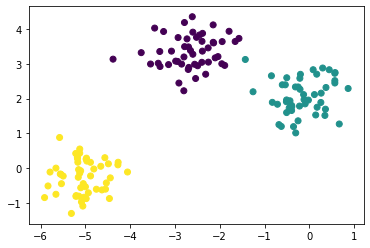

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
n_clusters = 3

Niech centra będą reprezentowane przez macierz $C$, gdzie pierwszy indeks numeruje centrum a drugi współrzędne. Wybierzmy jako centra kilka punktów z danych np.:

In [5]:
c = X[[1,2,3],:]


### Pogrupuj wg. centrów


Mając centra możemy przypisac każdy punkt ze zbioru danych do klasy o numerze  najbliższego mu centrum



In [21]:
km = []
# YOUR CODE HERE
# raise NotImplementedError()
for x_ in X:
    km.append(np.argmin([np.sum((x_ - c_)**2) for c_ in c]))

In [22]:
np.testing.assert_allclose(km[:17],[2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2])

Zobaczmy jaki otrzymalismy wynik:

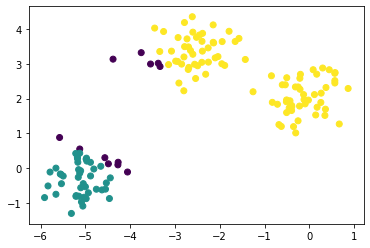

In [23]:
plt.scatter(X[:,0],X[:,1],c=km)

### Aktualiza centrów

Mając poklasyfikowane (wstępnie) dane można policzych ich centra po klasach 

In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()

c = np.mean(X[])


In [ ]:
assert c.shape == (n_clusters, 2)
np.testing.assert_allclose(c,[[-4.22834853,  1.44810254],
       [-5.1174013 , -0.34387858],
       [-1.27885324,  2.68624462]], rtol=1e-3)

### Oblicz SSE 

Suma kwadratów odchyleń od średniej wewnątrz klastra:

$$
   SSE = \sum_c  \sigma^2_c
$$

 - $\sigma^2_c$ - wariancja  klastra $c$

 


In [24]:
SSE = None
# YOUR CODE HERE
P=[np.var(X[km==i]) for i in range(n_clusters)]
SSE = np.sum(P)
# raise NotImplementedError()


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
np.testing.assert_allclose(SSE, 20.1794,rtol=1e-3)

### Zaimplementuj algorytm k-means

Startując z począktowego przypisania średnich (centrów):

 1. Dla każdej klasy obliczamy średnią.
 2. Przypisujemy danym nowe klasy kierując się minimalną odległością od średniej
 3. Powtarzamy 1 i 2 aż podział nie będzie się zmieniał.
 
Algorytm można monitorować za pomocą wartości SSE.

**Note:** wystarczy kilka iteracji. 


In [28]:
# YOUR CODE HERE
# raise NotImplementedError()
for i in range(10):
    km=[]
    for x_ in X:
        km.append((np.argmin([np.sum((x_-c_)**2) for c_ in c])))
    km=np.array(km)
    c = [np.mean(X[km==i],axis=0) for i in range(n_clusters)]
    c = np.stack(c)
    P=[np.var(X[km==i]) for i in range(n_clusters)]
    SSE = np.sum(P)
    print(SSE)

20.179479083179757
22.053691002983953
18.575450514419433
16.642698369278524
16.492575727998783
16.492575727998783
16.492575727998783
16.492575727998783
16.492575727998783
16.492575727998783


In [29]:
np.testing.assert_allclose(np.sort(np.bincount(km)), [49, 50, 51])

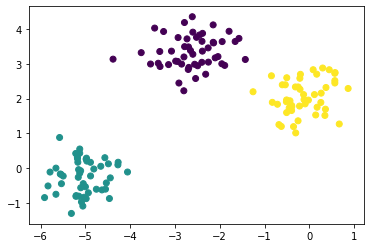

In [30]:
plt.scatter(X[:,0],X[:,1],c=km)

## implementacja w sklearn

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            )
y_km = km.fit_predict(X)


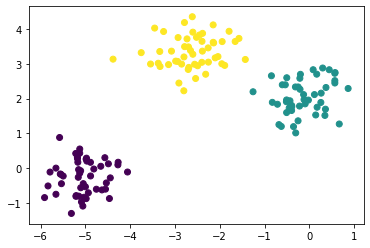

In [26]:
plt.scatter(X[:,0],X[:,1],c=y_km)

In [27]:
np.bincount(y_km)

array([50, 49, 51])